# Random Forest Model for Customer Churn Prediction

**Objective:** Train and evaluate a Random Forest Classifier as an alternative to Logistic Regression.

**Why Random Forest?**
- **Ensemble method:** Combines multiple decision trees for better predictions
- **Handles non-linear relationships** better than logistic regression
- **Less prone to overfitting** than single decision trees
- **Can capture complex feature interactions**

**Key Steps:**
1. Load preprocessed data
2. Apply SMOTE for class balance
3. Train Random Forest with hyperparameter tuning
4. Evaluate and compare with Logistic Regression
5. Select the best model based on business needs


In [ ]:
# Import required libraries for Random Forest classification
import pandas as pd  # Data manipulation
import seaborn as sns  # Visualization
import matplotlib.pyplot as plt  # Plotting
from sklearn.tree import DecisionTreeClassifier  # Base decision tree (not used, but imported)
from sklearn.ensemble import RandomForestClassifier  # Random Forest classifier
from imblearn.over_sampling import SMOTE  # Handle class imbalance
from sklearn.model_selection import train_test_split, GridSearchCV  # Model selection and tuning
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score  # Evaluation metrics

In [ ]:
# Load the preprocessed dataset created in the preprocessing notebook
# This data is already cleaned, encoded, and ready for modeling
data = pd.read_csv("../Data/processed_data.csv", encoding="utf-8")

In [ ]:
# Display all columns without truncation
pd.set_option('display.max_columns', None)

# Preview the first few rows to verify data loaded correctly
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,0,1,0,1,0,1,0,0,0,0,0,1,29.85,29.85,0,True,False,False,False,False,True,False,False,True,False
1,1,0,0,0,34,1,0,1,0,0,0,1,0,56.95,1889.50,0,True,False,False,False,False,False,True,True,False,False
2,1,0,0,0,2,1,1,0,0,0,0,0,1,53.85,108.15,1,True,False,False,False,False,False,True,True,False,False
3,1,0,0,0,45,1,0,1,1,0,0,1,0,42.30,1840.75,0,True,False,False,True,False,False,False,False,True,False
4,0,0,0,0,2,0,0,0,0,0,0,0,1,70.70,151.65,1,False,True,False,False,False,True,False,True,False,False


In [ ]:
# Check the class distribution before applying SMOTE
# We expect to see imbalance (more 0s than 1s)
data['Churn'].value_counts()

Churn
0    5165
1    1857
Name: count, dtype: int64

In [ ]:
# Separate features (X) from target variable (y)
x = data.drop(columns="Churn", axis=1)  # All features except Churn
y = data["Churn"]  # Target variable

# Apply SMOTE to balance the classes
# This creates synthetic samples of the minority class (Churn = 1)
smote = SMOTE(random_state=42)  # random_state for reproducibility
x, y = smote.fit_resample(x, y)  # Balance the dataset

In [ ]:
# Verify that classes are now balanced after SMOTE
# Should show equal counts for 0 and 1
y.value_counts()

Churn
0    5165
1    5165
Name: count, dtype: int64

In [ ]:
# Split data into training (70%) and testing (30%) sets
# random_state=42 ensures same split as logistic regression for fair comparison
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize Random Forest Classifier with default parameters
# This will be used as the base estimator for Grid Search
Forest = RandomForestClassifier()

## Hyperparameter Tuning with Grid Search

**Parameters to tune:**
- **n_estimators:** Number of trees in the forest (more trees = better but slower)
- **criterion:** Split quality measure ('gini' or 'entropy')
- **max_depth:** Maximum depth of each tree (prevents overfitting)
- **min_samples_split:** Minimum samples required to split a node
- **min_samples_leaf:** Minimum samples required at leaf node

The commented cell below shows the Grid Search process. After finding optimal parameters, they're hardcoded for efficiency.


In [ ]:
# Grid Search for optimal hyperparameters (commented out after finding best params)
# This process tested 648 different parameter combinations with 5-fold cross-validation
# Total: 3,240 model fits to find the best configuration

# param_grid_forest = {
#     "n_estimators": [100, 200, 300, 400, 500, 1000],  # Number of trees
#     "criterion": ["gini", "entropy"],  # Split criterion
#     "max_depth": [None, 10, 20, 30, 40, 50],  # Maximum tree depth
#     "min_samples_split": [2, 5, 10],  # Min samples to split internal node
#     "min_samples_leaf": [1, 2, 4],  # Min samples at leaf node
# }

# grid_search_Forest = GridSearchCV(
#     estimator=Forest, 
#     param_grid=param_grid_forest, 
#     cv=5,  # 5-fold cross-validation
#     n_jobs=-1,  # Use all CPU cores
#     verbose=2  # Show progress
# )

# grid_search_Forest.fit(x_train, y_train)

# print("Best parameters found: ", grid_search.best_params_)
# print("Best cross-validation score: ", grid_search.best_score_)

### Grid Search Results

**Process:** Tested 648 parameter combinations across 5 folds = 3,240 total model fits

**Best Parameters Found:**
- `criterion`: 'entropy' (information gain)
- `max_depth`: 10 (limits tree depth to prevent overfitting)
- `min_samples_leaf`: 4 (at least 4 samples required at each leaf)
- `min_samples_split`: 5 (at least 5 samples needed to split a node)

**Best Cross-Validation Score:** 0.7668 (~77% accuracy)

In [ ]:
# Create Random Forest model with optimized hyperparameters
BestForest = RandomForestClassifier(
    criterion='entropy',  # Use entropy for split criterion
    max_depth=10,  # Limit depth to prevent overfitting
    min_samples_leaf=4,  # Minimum 4 samples at leaf nodes
    min_samples_split=5  # Minimum 5 samples to split a node
    # Note: n_estimators defaults to 100 trees
)

In [ ]:
# Train the Random Forest model on training data
BestForest.fit(x_train, y_train)

# Get probability predictions for test set
y_prob = BestForest.predict_proba(x_test)[:, 1]  # Probability of churn (class 1)

# Apply custom threshold (same as logistic regression for fair comparison)
# Lower threshold (0.35) makes model more sensitive to detecting churn
custom_threshold = 0.35
y_pred_custom = (y_prob >= custom_threshold).astype(int)

In [ ]:
# Evaluate Random Forest model performance
print("\nClassification Report with Custom Threshold:")
print(classification_report(y_test, y_pred_custom))

# Calculate weighted F1-score (accounts for class imbalance)
f1 = f1_score(y_test, y_pred_custom, average="weighted")
print(f"Weighted F1-Score:{f1:.2f}")

# Display overall accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred_custom):.2f}")


Classification Report with Custom Threshold:
              precision    recall  f1-score   support

           0       0.93      0.70      0.80      1552
           1       0.76      0.95      0.84      1547

    accuracy                           0.82      3099
   macro avg       0.84      0.82      0.82      3099
weighted avg       0.84      0.82      0.82      3099

Weighted F1-Score:0.82
Accuracy: 0.82


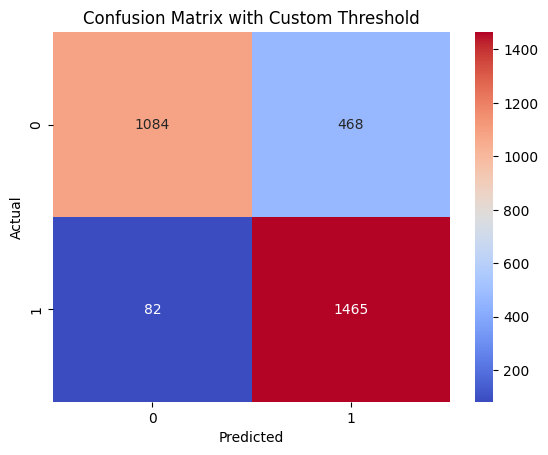

In [ ]:
# Create and visualize confusion matrix
cm = confusion_matrix(y_test, y_pred_custom)
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest with Custom Threshold")
plt.show()

## Model Comparison

### Logistic Regression Results (for reference)

**Logistic Regression Performance:**
```
Classification Report with Custom Threshold:

              precision    recall  f1-score   support
           0       0.92      0.72      0.81      1552
           1       0.77      0.93      0.84      1547

    accuracy                           0.83      3099
```

**Key Metrics:**
- Weighted F1-Score: **0.83**
- Accuracy: **0.83**
- Class 1 Recall: **0.93** (catches 93% of churners)

### Random Forest Results

**Random Forest Performance:**
```
Classification Report with Custom Threshold:

              precision    recall  f1-score   support
           0       0.93      0.70      0.80      1552
           1       0.76      0.95      0.84      1547

    accuracy                           0.82      3099
```

**Key Metrics:**
- Weighted F1-Score: **0.82**
- Accuracy: **0.82**
- Class 1 Recall: **0.95** (catches 95% of churners!) ⭐

## Final Model Selection Decision

### Performance Comparison:

| Metric | Logistic Regression | Random Forest | Winner |
|--------|-------------------|---------------|--------|
| Accuracy | 83% | 82% | Logistic Regression |
| F1-Score | 0.83 | 0.82 | Logistic Regression |
| **Churn Recall (Class 1)** | 93% | **95%** | **Random Forest** ⭐ |
| Precision (Class 0) | 92% | 93% | Random Forest |

### Business Considerations:

**The models have similar overall accuracy**, but there's a crucial difference:

- **Random Forest captures 95% of churners** vs 93% for Logistic Regression
- This means **2% fewer false negatives** (missed churners)
- In business terms: **fewer customers leave without us knowing**

### Decision: **Random Forest is the better choice** ✅

**Why?**
For a telecom company, **missing a churner is more costly** than false alarms:
- **Cost of losing a customer:** High (lost revenue, acquisition costs)
- **Cost of false positive:** Low (unnecessary retention offer)

Therefore, maximizing recall (catching churners) is more important than overall accuracy.

**Trade-off:** We sacrifice 1% accuracy to catch 2% more churners - a worthwhile trade-off!